<a href="https://colab.research.google.com/github/patrycjaarcisz/learning-data-science/blob/main/IBM_DScourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notatki sporzadzone na bazie kursow IBM.

zrodlo i sylabus: https://www.coursera.org/professional-certificates/ibm-data-science

## Getting familiar with notebooks, basic commands.

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
x = np.array([1, 2, 3, 3, 3, 4, 5, 6, 1, 1, 1, 9])

In [ ]:
type(x)

numpy.ndarray

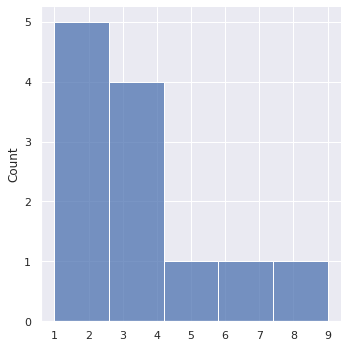

In [ ]:
sns.displot(x)

## Data Cleaning using Python with Pandas Library.

zrodlo: https://towardsdatascience.com/data-cleaning-with-python-using-pandas-library-c6f4a68ea8eb

In [ ]:
# importowanie bibliotek

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import io

### Pozyskanie i wyswietlenie danych.

In [ ]:
uploaded = files.upload()

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Usuwanie niepotrzebnych kolumn. 

In [ ]:
to_drop = ["cp", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [ ]:
df.drop(to_drop, axis=1, inplace=True)
df.head(5)

,age,sex,trestbps,chol
0,63,1,145,233
1,37,1,130,250
2,41,0,130,204
3,56,1,120,236
4,57,0,120,354


### Zmiana nazw kolumn na wygodniejsze.

In [ ]:
new_name = {
    "age": "Age", 
    "sex": "Sex", 
    "trestbps": "Bps", 
    "chol": "Cholesterol"
}

df.rename(columns=new_name, inplace=True)
df.head(5)

,Age,Sex,Bps,Cholesterol
0,63,1,145,233
1,37,1,130,250
2,41,0,130,204
3,56,1,120,236
4,57,0,120,354


### Zmiana wartosci na bardziej czytelne.

In [ ]:
replace_values = {
    0: "F",
    1: "M"
}

df.replace({"Sex": replace_values})
df.head()

,Age,Sex,Bps,Cholesterol
0,63,1,145,233
1,37,1,130,250
2,41,0,130,204
3,56,1,120,236
4,57,0,120,354


## Exploratory data analysis in Python.

zrodlo: https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0105EN-SkillsNetwork-20083975&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("data.csv")
df.head(5) # wyswietlenie pierwszych pieciu rzedow

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail(5) # wyswietlenie ostatnich pieciu rzedow

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


"Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry."

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
# pozbywamy sie niepotrzebnych kolumn
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'Popularity', 'Number of Doors'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
# zmiana nazwy kolumn

In [ ]:
df.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPH": "MPG-H",
    "city MPG": "MPG-C",
    "MSRP": "Price"}, inplace=True)
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,highway MPG,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Usuwanie dublujacych sie wierszy.

In [ ]:
df.shape # ilosc wierszy i kolumn naszych danych

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("liczba powtarzajacych sie wierszy: ", duplicate_rows_df.shape)

liczba powtarzajacych sie wierszy:  (989, 10)


In [ ]:
df.count() # sprawdzenie ilosci wierszy

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
highway MPG     11914
city mpg        11914
Price           11914
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,highway MPG,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
highway MPG     10925
city mpg        10925
Price           10925
dtype: int64

### Pozbywanie sie brakujacych wartosci.

(w tym przypadku mozemy sie ich pozbyc, poniewaz jak wyjdzie z obliczen, jest ok. 100 brakujacych wartosci, a ogolnych wartosci jest ponad 10000, wiec jest to relatywnie mala liczba w calej skali, NIE ZAWSZE MOZNA JE USUNAC)

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
highway MPG      0
city mpg         0
Price            0
dtype: int64


In [ ]:
df = df.dropna() # pozbycie sie null val
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
highway MPG     10827
city mpg        10827
Price           10827
dtype: int64

In [ ]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
highway MPG     0
city mpg        0
Price           0
dtype: int64


### Szukanie odstajacych wartosci.

"An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)."

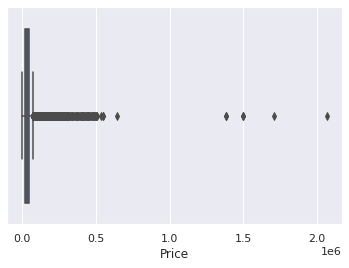

In [ ]:
sns.boxplot(x=df['Price'])

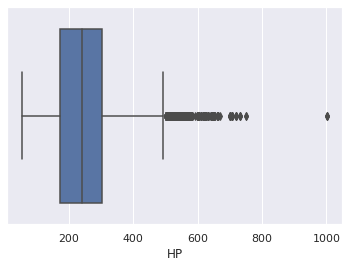

In [ ]:
sns.boxplot(x=df['HP'])

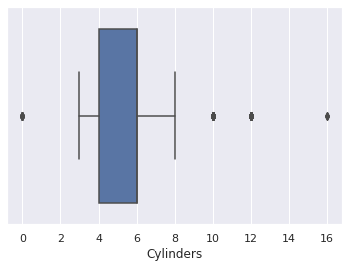

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Year               9.0
HP               130.0
Cylinders          2.0
highway MPG        8.0
city mpg           6.0
Price          21327.5
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

"As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing."

### Wykres roznych cech.


"Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company."

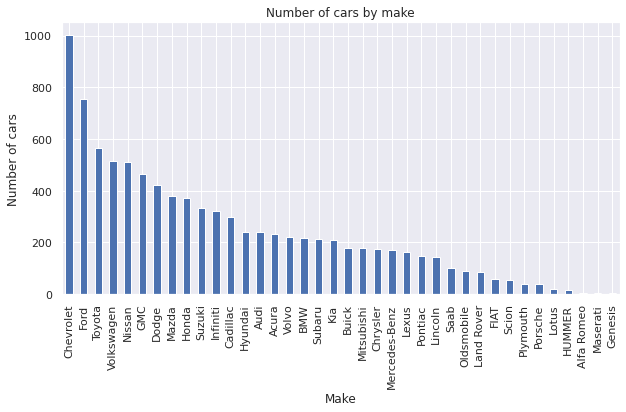

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make');

"Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders"

,Year,HP,Cylinders,highway MPG,city mpg,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
highway MPG,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
city mpg,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


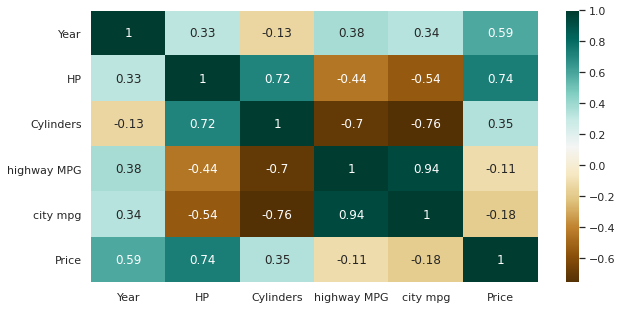

In [ ]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

"We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points."

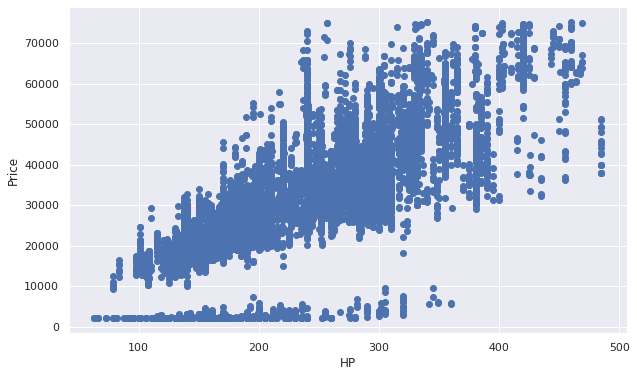

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## Nowa sekcja